In [89]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

# Flattening

In [90]:
files= np.loadtxt('l1data.txt', dtype='str')
darks = np.loadtxt('darksl1.txt', dtype='str')
allimagedata = [fits.getdata(f) for f in files]
darksimages = [fits.getdata(f) for f in darks]
darksmedia = np.median(darksimages, axis=0)
flatteddatal1 = allimagedata - darksmedia

We plot an example one

<matplotlib.colorbar.Colorbar instance at 0x7fb10def6758>

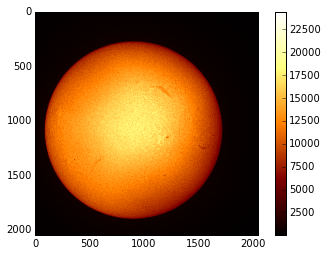

In [91]:
plt.imshow(flatteddatal1[0],cmap='afmhot')
plt.colorbar()

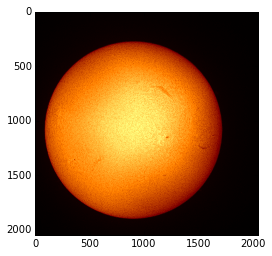

In [92]:
plt.imshow(allimagedata[0],cmap='afmhot')

We can make a fit file with the new flatten data. 

In [93]:
for i in range(109):
    fits.writeto(files[i]+'processed',flatteddatal1[i],header=fits.open(files[i])[0].header)

<matplotlib.colorbar.Colorbar instance at 0x7fb10dc8a290>

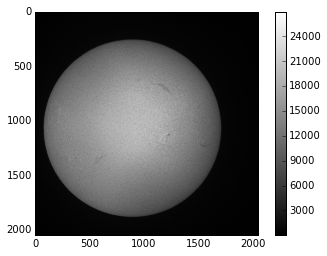

In [94]:
onefit=fits.getdata('imoa_06563_l1_20160126_12284100_b1.ftsprocessed')
headerone=fits.open('imoa_06563_l1_20160126_12284100_b1.ftsprocessed')[0].header
plt.imshow(onefit,cmap='gray')
plt.colorbar()

In [95]:
headerone

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
DATE    = '2016-01-26T12:28:46' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
FILENAME= 'imoa_06563_l1_20160126_12284100_b1.fts' / Original filename          
INSTITUT= 'OMP, OA, Pic-du-Midi' / Name of the institut                         
INSTRUME= 'CLIMSO L1'          / Name of the instrument                         
CAMERA  = 'U4000   '           / Name of the CCD camera                         
OBSERVER= 'OA-FIDUCIAL'        / Name of instrument operator                    
DATE    = '2016-01-26T12:28:41.576' / Date start of the observation UT          
DATE-OBS= '2016-01-26T12:28:

# Brillance

We create the median of all the flatted data.

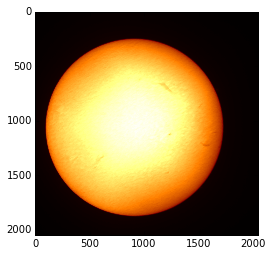

In [96]:
medianflattedl1 = np.median(flatteddatal1, axis=0)
plt.imshow(medianflattedl1,cmap='afmhot')

We can now mask to get only the disk of the Sun. For l1 we decide a threshold of 900 *adu*. We create the mask and put to zero all below 900. The mask looks like

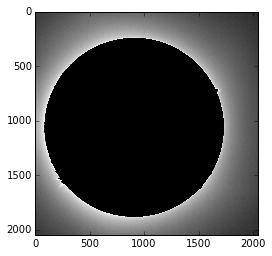

In [97]:
maskvalue = 1000
maskl1 = medianflattedl1 < maskvalue
maskedl1=(np.where(maskl1,1,0))*medianflattedl1
plt.imshow(maskedl1, cmap='gray')

The resulting masked image looks like:

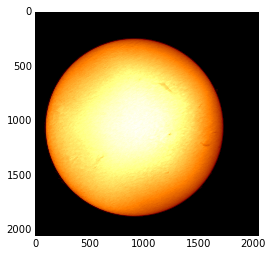

In [98]:
maskl1 = medianflattedl1 < maskvalue
maskedl1=(np.where(maskl1,0,1))*medianflattedl1
plt.imshow(maskedl1,cmap='afmhot')


Now we calculate the total of the masked image to get the luminosity of the Sun:
    

In [99]:
totall1 = np.sum(maskedl1)
print(totall1)

27624313625.0


# Brillance Calibration

Above we have found the total luminosity in $H\alpha$ from the Sun disk. We know that the total luminosity of the Sun in $H\alpha$ should be 1.59 W/m/nm. With this we can calibrate each pixel.

In [100]:
call1 = 1.59/totall1
maskedl1 = maskedl1 * call1
call1=call1 * flatteddatal1

We can plot one to verify:

<matplotlib.colorbar.Colorbar instance at 0x7fb10dacd200>

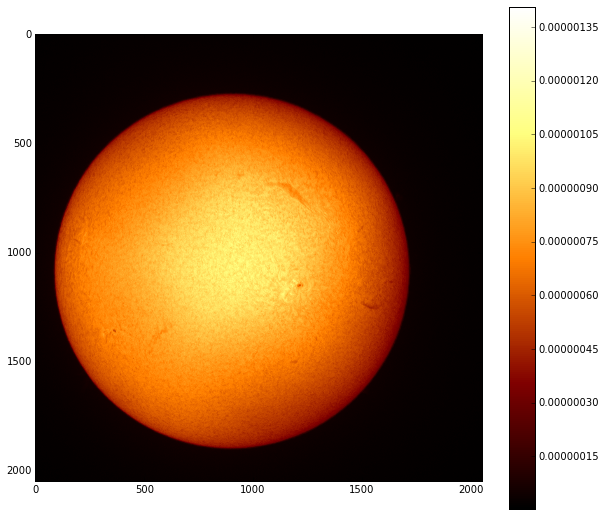

In [101]:
plt.figure(num=None, figsize=(10, 9))
plt.imshow(call1[0],cmap='afmhot')
plt.colorbar()

## Limb Darkening

The first order expression of Limb Darkening is:

$$\frac{I(\phi)}{I(0)}= 1+ A_1 \, (1- \cos(\phi))$$

where $\phi$ represents the angle. 

We evaluate and get

In [102]:
sunmask = maskedl1[1000]  != 0
sundiskmaksedl1 = maskedl1[1000][sunmask]

## plt.plot(np.arange(1,1647),sundiskmaksedl1)